In [7]:
import numpy as np
from matplotlib import pyplot as plt
import camb
from scipy.interpolate import interp1d


In [8]:
Omega_b = 0.5
Omega_c = 0.25

# Create the grid

In [9]:
side = 500
Volume = side**3

n_cells = 100
spacing = side/n_cells

kF = 2*np.pi/side
kN = 2*np.pi/spacing

print(kF, "h/Mpc", kN, "h/Mpc")


0.012566370614359173 h/Mpc 1.2566370614359172 h/Mpc


In [10]:
kx = np.fft.fftfreq(n_cells,spacing)*np.pi*2
ky = np.fft.fftfreq(n_cells,spacing)*np.pi*2
kz = np.fft.rfftfreq(n_cells,spacing)*np.pi*2

print(kx.shape, ky.shape, kz.shape)

(100,) (100,) (51,)


In [11]:
# ordino i k_i

kx = np.fft.fftshift(kx)
ky = np.fft.fftshift(ky)
kz = np.fft.fftshift(kz)


In [13]:
from scipy.interpolate import _interpolate


pks = np.zeros((n_cells, n_cells, n_cells//2+1))

for i in range(n_cells):
    kx = i if i<= n_cells // 2 else i-n_cells
    kx *= 2*np.pi/side

    for j in range(n_cells):
        ky = j if j<n_cells // 2 else j-n_cells
        ky *= 2*np.pi/side

        for k in range(n_cells//2+1):
            kz = k*2*np.pi/side
            k = np.sqrt(kx**2 + ky**2 + kz**2)
            knorm = np.sqrt(k)

            pks[i,j,k] = pk_interpolate(knorm) # type: ignore


NameError: name 'pk_interpolate' is not defined

In [ ]:
# generate Random field

phase = np.random.uniform(size= pks.shape)*2*np.pi

phase.shape

delta_k_norm= np.random.normal(size=pks.shape)*np.sqrt(pks*Volume/2)

delta_k = delta_k_norm * (np.cos(phase)+ 1j* np.sin(phase))

delta_k.shape

(100, 100, 51)

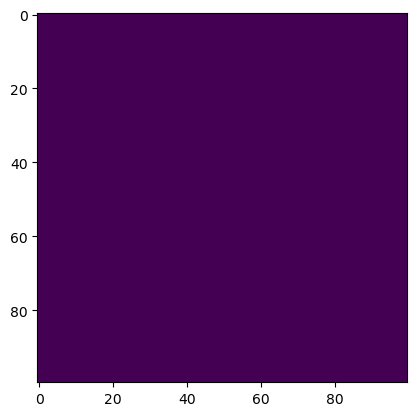

In [ ]:
plt.imshow(delta_k_norm[:,:,2])
delta_x = np.fft.irfftn(delta_k, norm="backward")/spacing

### I campi gaussiani vanno bene per redshift elevati, se provassi a z = 1 avrei delta(x) a x più basse di 1, che non va bene

## Extract power spectrum

In [14]:
kx = np.fft.fftfreq(n_cells,spacing)*np.pi*2
ky = np.fft.fftfreq(n_cells,spacing)*np.pi*2
kz = np.fft.fftfreq(n_cells,spacing)*np.pi*2

k_norm=[]

for i in range(n_cells):
    kx = i if i<= n_cells // 2 else i-n_cells
    kx *= 2*np.pi/side

    for j in range(n_cells):
        ky = j if j<n_cells // 2 else j-n_cells
        ky *= 2*np.pi/side

        for k in range(n_cells//2+1):
            kz = k*2*np.pi/side
            k = np.sqrt(kx**2 + ky**2 + kz**2)
            knorm = np.sqrt(k)
            k_norm.append(knorm)


In [15]:
delta_k_sq= np.abs(delta_k)**2
pks = delta_k_sq.flatten()
plt.loglog(k_norm, pks, "o",label = 'delta')

NameError: name 'delta_k' is not defined